**непараметрическая регрессия**

Евгений Борисов esborisov@sevsu.ru

In [1]:
import numpy as np
from numpy import random as rng
import matplotlib.pyplot as plt

In [2]:
np.set_printoptions(precision=2)

# генерируем набор данных

In [3]:
from sklearn.datasets import make_moons

X,label = make_moons(n_samples=512, noise=.1)
X[label==1,0] += (X[label==0,0].max()-.1)
X,y = X[:,[0]],X[:,[1]]
display( X.shape )

(512, 1)

In [4]:
# X = np.linspace(-1,2,512).reshape(-1,1)
# y = np.sin(X*2.9)+np.cos(X*5.9)+rng.rand(*X.shape)
# display( X.shape )

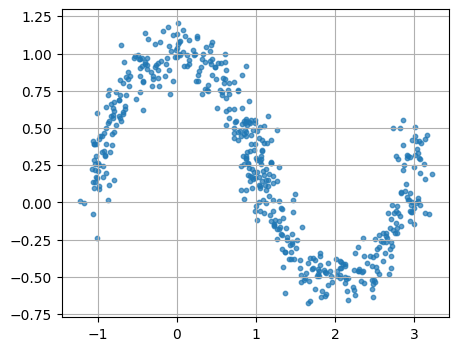

In [5]:
# рисуем исходные данные
plt.figure(figsize=(5,4)) # размер картинки
plt.scatter( x=X, y=y, s=10, alpha=0.7 ) # точки учебного набора
plt.grid()
plt.show()

# модель регрессии

In [6]:
# прямоугольное ядро
def kernel_rect(x): return np.abs(x)<=1.0

# треугольное ядро
def kernel_tri(x): return (1.0-np.abs(x))*(np.abs(x)<=1.0)

# квадратичное ядро (Епанечникова)
def kernel_square(x): return (1.0-np.square(x))*(np.abs(x)<=1.0)
    
# гауссово ядро
def kernel_gauss(x): return np.exp(-2.0*np.square(x))

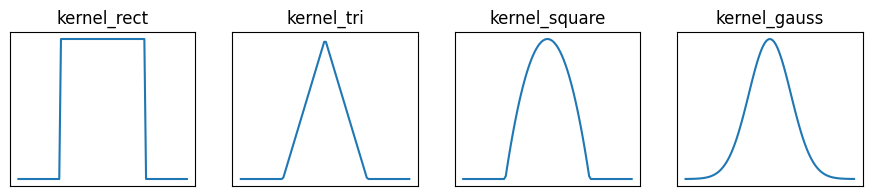

In [7]:
x = np.linspace(-2.,2,100)
kernels = [ kernel_rect,kernel_tri,kernel_square,kernel_gauss ]
fig,ax = plt.subplots(1,len(kernels),figsize=(11,2),sharey=True,sharex=True)
for n,k in enumerate(kernels):
    ax[n].plot(x,k(x))
    ax[n].set_xticks([])
    ax[n].set_yticks([])
    ax[n].set_title(k.__name__)
plt.show()

---

непараметрическая (ядерная) регрессия, формула Надарая-Ватсона

$$ 
a(x,X,y) = \frac 
 { \sum\limits_{i=1}^m y_i K\left(\frac{\rho(x,x_i)}{h}\right) }
 { \sum\limits_{i=1}^m K\left(\frac{\rho(x,x_i)}{h}\right) } 
$$

In [8]:
from sklearn.metrics.pairwise import euclidean_distances as metric

class KernelRegression:
    
    def __init__( self, kernel=kernel_gauss, metric=metric, h=.2 ):
        self._metric = metric
        self._kernel = kernel # ядро влияет на на гладкость аппроксимации
        self._h = h # ширина окна, влияет на точность аппроксимации
        self._X = np.array([])
        self._y = np.array([])
        
    def fit(self,X,y):  
        assert len(X.shape)==2
        assert len(X)==len(y)  
        self._X = X
        self._y = y
        return self

    def predict(self,x):
        assert len(self._X)>1
        assert self._X.shape[1]==x.shape[1]
        d = self._metric( x, self._X )
        w = self._kernel(d/self._h) 
        return (self._y.T*w).sum(axis=1)/w.sum(axis=1) # значение регресии        

In [9]:
model = KernelRegression().fit(X,y) # обучаем модель

## тестируем

In [10]:
from sklearn.metrics import mean_squared_error

display( mean_squared_error( y_true=y, y_pred = model.predict(X) ) )

0.024926557959196967

----

(50, 1)

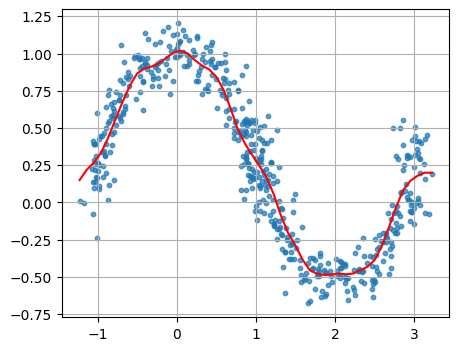

In [11]:
# генерируем сетку, для которой будем считать регрессию
u = np.linspace(X.min(),X.max(),50).reshape(-1,1)
display( u.shape )

predicted = model.predict(u) # значение регрессии

# рисуем результат
plt.figure(figsize=(5,4)) # размер картинки
plt.scatter(x=X,y=y,s=10,alpha=0.7) # точки учебного набора
plt.plot(u,predicted,c='r') # значение регрессии
plt.grid()
plt.show()

---

In [12]:
# !pip3 install watermark

In [13]:
%load_ext watermark
%watermark --python
%watermark --iversions

Python implementation: CPython
Python version       : 3.11.7
IPython version      : 8.21.0

matplotlib: 3.8.2
numpy     : 1.26.3

